In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("personal_energy_focus_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               365 non-null    object 
 1   day_of_week        365 non-null    object 
 2   sleep_hours        365 non-null    float64
 3   mood_score         365 non-null    int64  
 4   energy_level       365 non-null    int64  
 5   focus_level        365 non-null    int64  
 6   screen_time_hours  365 non-null    float64
 7   workday            365 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 22.9+ KB


In [3]:
# Convert date column
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.head(7)

,date,day_of_week,sleep_hours,mood_score,energy_level,focus_level,screen_time_hours,workday
0,2025-01-01,Wednesday,7.596057,4,4,5,5.8,Yes
1,2025-01-02,Thursday,5.899808,4,3,4,5.8,Yes
2,2025-01-03,Friday,6.302946,2,4,5,5.2,Yes
3,2025-01-04,Saturday,4.073073,5,1,1,6.9,No
4,2025-01-05,Sunday,8.758779,4,4,4,5.7,No
5,2025-01-06,Monday,8.361207,4,3,4,5.8,Yes
6,2025-01-07,Tuesday,7.349241,4,4,5,5.0,Yes


In [7]:
# Round sleep hours to 1 decimal
df["sleep_hours"] = df["sleep_hours"].round(1)

# Clip values just to be safe
df["sleep_hours"] = df["sleep_hours"].clip(4, 9)
df["screen_time_hours"] = df["screen_time_hours"].clip(2, 10)

# Ensure score ranges
for col in ["mood_score", "energy_level", "focus_level"]:
    df[col] = df[col].clip(1, 5)

# Standardize workday column
df["workday"] = df["workday"].str.strip().str.capitalize()


In [8]:
df.isnull().sum()

,0
date,0
day_of_week,0
sleep_hours,0
mood_score,0
energy_level,0
focus_level,0
screen_time_hours,0
workday,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               365 non-null    datetime64[ns]
 1   day_of_week        365 non-null    object        
 2   sleep_hours        365 non-null    float64       
 3   mood_score         365 non-null    int64         
 4   energy_level       365 non-null    int64         
 5   focus_level        365 non-null    int64         
 6   screen_time_hours  365 non-null    float64       
 7   workday            365 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [10]:
df.describe()

,date,sleep_hours,mood_score,energy_level,focus_level,screen_time_hours
count,365,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2025-07-01 23:59:59.999999744,6.964932,3.416438,2.983562,3.052055,6.098356
min,2025-01-01 00:00:00,4.000000,2.000000,1.000000,1.000000,2.000000
25%,2025-04-02 00:00:00,6.200000,2.000000,2.000000,2.000000,5.200000
50%,2025-07-02 00:00:00,7.000000,3.000000,3.000000,3.000000,6.100000
75%,2025-10-01 00:00:00,7.700000,4.000000,4.000000,4.000000,6.900000
max,2025-12-31 00:00:00,9.000000,5.000000,5.000000,5.000000,10.000000
std,NaN,1.123049,1.087771,0.867454,1.126615,1.390291


In [11]:
# Month & week info
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.isocalendar().week

# Productivity score (custom metric)
df["productivity_score"] = (
    df["focus_level"] * 0.5 +
    df["energy_level"] * 0.3 +
    df["mood_score"] * 0.2
).round(2)

df.head()

,date,day_of_week,sleep_hours,mood_score,energy_level,focus_level,screen_time_hours,workday,month,week,productivity_score
0,2025-01-01,Wednesday,7.6,4,4,5,5.8,Yes,1,1,4.5
1,2025-01-02,Thursday,5.9,4,3,4,5.8,Yes,1,1,3.7
2,2025-01-03,Friday,6.3,2,4,5,5.2,Yes,1,1,4.1
3,2025-01-04,Saturday,4.1,5,1,1,6.9,No,1,1,1.8
4,2025-01-05,Sunday,8.8,4,4,4,5.7,No,1,1,4.0


In [13]:
df.groupby("workday")[[
    "focus_level",
    "energy_level",
    "productivity_score"
]].mean().round(2)

,focus_level,energy_level,productivity_score
workday,,,
No,3.12,2.96,3.14
Yes,3.03,2.99,3.09


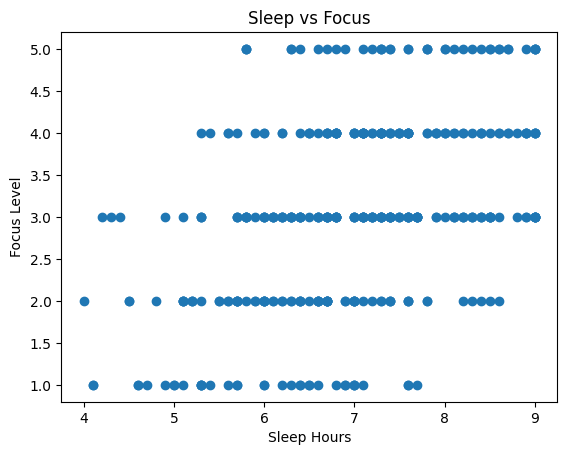

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df["sleep_hours"], df["focus_level"])
plt.xlabel("Sleep Hours")
plt.ylabel("Focus Level")
plt.title("Sleep vs Focus")
plt.show()

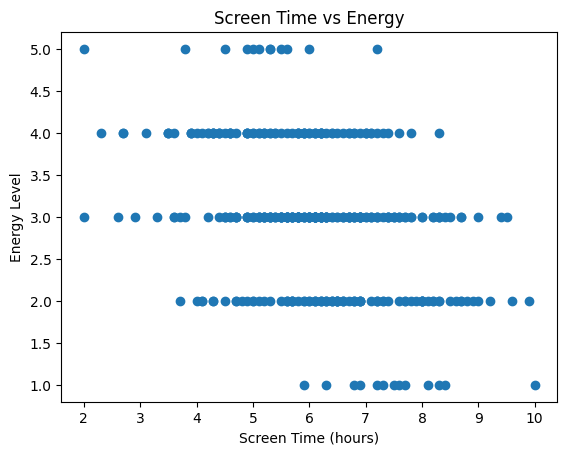

In [15]:
plt.figure()
plt.scatter(df["screen_time_hours"], df["energy_level"])
plt.xlabel("Screen Time (hours)")
plt.ylabel("Energy Level")
plt.title("Screen Time vs Energy")
plt.show()

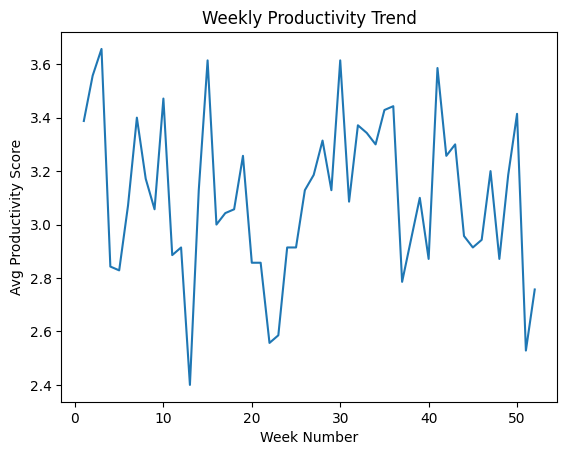

In [16]:
weekly = df.groupby("week")["productivity_score"].mean()

plt.figure()
plt.plot(weekly)
plt.xlabel("Week Number")
plt.ylabel("Avg Productivity Score")
plt.title("Weekly Productivity Trend")
plt.show()

In [17]:
corr = df[[
    "sleep_hours",
    "screen_time_hours",
    "mood_score",
    "energy_level",
    "focus_level",
    "productivity_score"
]].corr()

corr

,sleep_hours,screen_time_hours,mood_score,energy_level,focus_level,productivity_score
sleep_hours,1.000000,0.045200,0.069558,0.597253,0.451562,0.514146
screen_time_hours,0.045200,1.000000,0.034969,-0.387504,-0.284962,-0.307035
mood_score,0.069558,0.034969,1.000000,0.056770,0.080899,0.336247
energy_level,0.597253,-0.387504,0.056770,1.000000,0.765498,0.851567
focus_level,0.451562,-0.284962,0.080899,0.765498,1.000000,0.943912
productivity_score,0.514146,-0.307035,0.336247,0.851567,0.943912,1.000000
